# Experiment Salatschleuder

Ziel: Messung der Zentripetalbeschleunigung in einer Salatschleuder. In der Vorlesung wurde dazu hergeleitet:

$$
    \vec{a}_\mathrm{zentr.}(t)  = -r \cdot\dot\varphi^2 \cdot\vec{e}_r = -r \cdot\omega^2 \cdot\vec{e}_r 
$$

Aufbau: Salatkorb wird über Zahnradgetriebe mit Übersetzung $\approx 4:1$ gedreht, Smartphone wird mit fester Orientierung (flach) in Salatkorb gelegt.

Messung durch Auslesung der Smartphone-Sensoren mit phyphox: Beschleunigung $( a_x, a_y, a_z )$ mit Accelerometer und Winkelgeschwindigkeit $(\omega_x, \omega_y, \omega_z)$ mit Gyrosensor.

Auswertung der Messdaten mit Python: 
- Einlesen der Daten als CSV (comma separated values) und Digitalisierung
- Darstellung der Absolutwerte
- Zusammenhang zwischen Zentripetalbeschleunigung und Winkelgeschwindigkeit
- Bestimmung des Radius des Beschleunigungssensors durch Anpassung der Funktion $a(\omega) = a_0 + r \omega^2$

Siehe auch phyphox-Video: https://youtu.be/W9p_KNRK-0Y

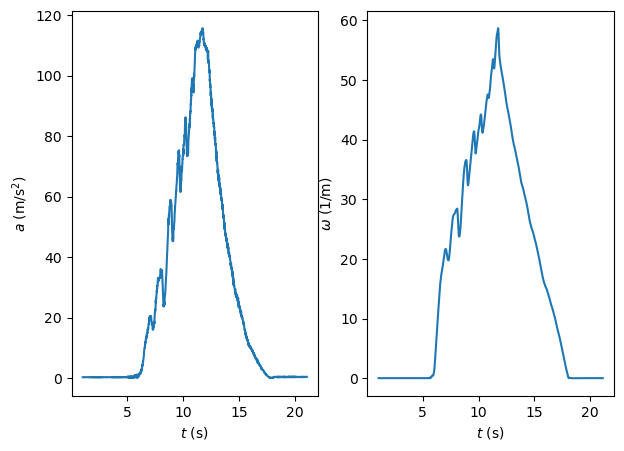

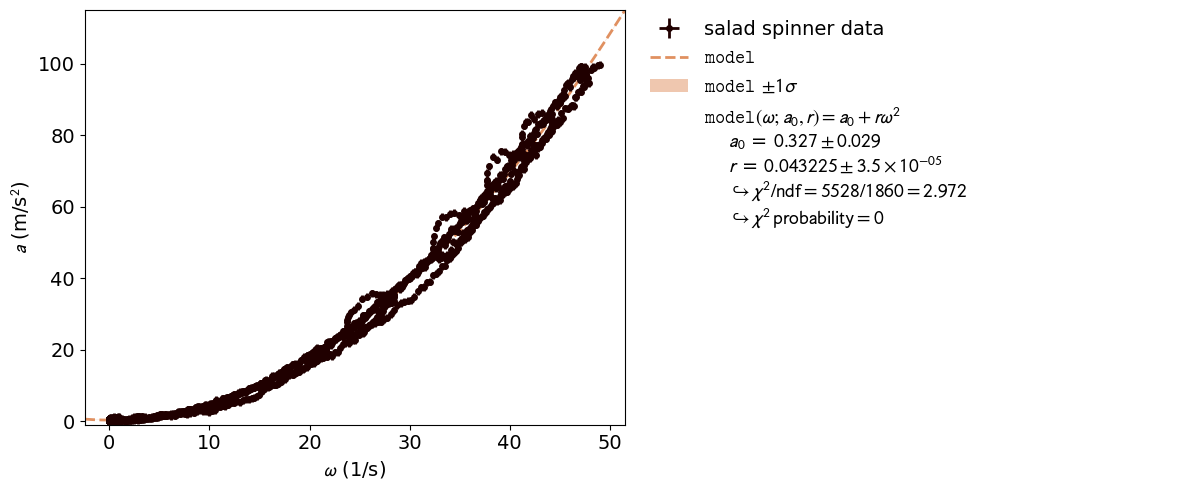

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from kafe2 import XYContainer, Fit, Plot

# read CSV file generated by phyphox (CSV with comma as delimiter) in Numpy array
data_gyr = np.genfromtxt( "Gyroscope.csv", delimiter=",", skip_header=1)
data_acc = np.genfromtxt( "Accelerometer.csv", delimiter=",", skip_header=1)

# data preprocessing: split into bins of width 0.01
step = 0.01
bmin = -100
bmax = 100
bins = np.arange( bmin, bmax, step )
digi_gyr = np.digitize( data_gyr, bins )
digi_acc = np.digitize( data_acc, bins )

# trim datasets "by hand", keeping only relevant part of data
digi_gyr = digi_gyr[100:2100]
digi_acc = digi_acc[100:2100]

# project columns of Numpy data array
acct = ( digi_acc[:,0] ) * step + bmin
accx = ( digi_acc[:,1] ) * step + bmin
accy = ( digi_acc[:,2] ) * step + bmin
accz = ( digi_acc[:,3] - 981 ) * step + bmin # subtract gravity of earth
acc  = np.sqrt( accx**2 + accy**2 + accz**2 )

gyrt = ( digi_gyr[:,0] ) * step + bmin
gyrx = ( digi_gyr[:,1] ) * step + bmin
gyry = ( digi_gyr[:,2] ) * step + bmin
gyrz = ( digi_gyr[:,3] ) * step + bmin
gyr  = np.sqrt( gyrx**2 + gyry**2 + gyrz**2 )

# plot
fig,ax = plt.subplots( 1, 2, figsize=(7,5))
ax[0].plot( acct, acc )
ax[1].plot( gyrt, gyr )

# add proper axis labels
ax[0].set_xlabel( r'$t$ (s)' )
ax[0].set_ylabel( r'$a$ (m/s$^2$)' )
ax[1].set_xlabel( r'$t$ (s)' )
ax[1].set_ylabel( r'$\omega$ (1/m)' )
#ax.grid( True )

#
# fit model to data (using kafe2)
#

# Fit model: a = a0 + r omega^2
def model( omega, a0, r ):
    return a0 + r * omega**2

# prepare data for kafe2
#data = XYContainer( gyr, acc )
#cut off data in case the accelerometer went into saturation
data = XYContainer( gyr[acc<100], acc[acc<100] )
data.add_error( 'y', 1.0 ) # just an assumption
data.label = "salad spinner data"
data.axis_labels = [ '$\\omega$ (1/s)', '$a$ (m/s$^2$)']
fit  = Fit( data=data, model_function=model )
fit.assign_model_function_name( "fit model" )
fit.assign_parameter_latex_names( omega='\\omega', a0='a_0', r = 'r')
fit.assign_model_function_latex_expression( "{a0} + {r}{omega}^2" )
fit.do_fit()

p = Plot( fit )
p.plot()
plt.savefig( 'salatschleuder.pdf' )
plt.show()


